Train on 160000 samples, validate on 40000 samples
Epoch 1/10
 - 25s - loss: 0.5247 - acc: 0.7383 - val_loss: 0.4728 - val_acc: 0.7770
Epoch 2/10
 - 21s - loss: 0.4788 - acc: 0.7724 - val_loss: 0.4654 - val_acc: 0.7807
Epoch 3/10
 - 22s - loss: 0.4677 - acc: 0.7794 - val_loss: 0.4592 - val_acc: 0.7843
Epoch 4/10
 - 21s - loss: 0.4607 - acc: 0.7842 - val_loss: 0.4547 - val_acc: 0.7863
Epoch 5/10
 - 22s - loss: 0.4550 - acc: 0.7860 - val_loss: 0.4549 - val_acc: 0.7885
Epoch 6/10
 - 21s - loss: 0.4507 - acc: 0.7888 - val_loss: 0.4503 - val_acc: 0.7889
Epoch 7/10
 - 22s - loss: 0.4474 - acc: 0.7913 - val_loss: 0.4493 - val_acc: 0.7900
Epoch 8/10
 - 21s - loss: 0.4426 - acc: 0.7937 - val_loss: 0.4485 - val_acc: 0.7906
Epoch 9/10
 - 21s - loss: 0.4405 - acc: 0.7950 - val_loss: 0.4481 - val_acc: 0.7912
Epoch 10/10
 - 21s - loss: 0.4370 - acc: 0.7964 - val_loss: 0.4451 - val_acc: 0.7924
90/90 [==============================] - 0s 111us/step
0.7999999947018094


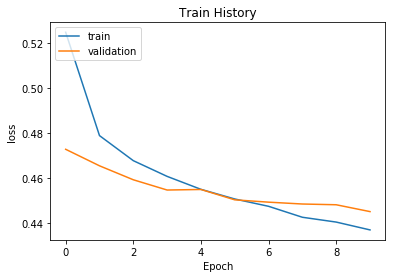

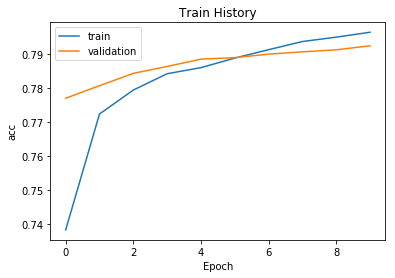

In [104]:
import keras
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
import keras.preprocessing.text as T
from keras.preprocessing import sequence
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.models import Sequential
from keras.layers.recurrent import LSTM
from matplotlib import pyplot as plt

#開檔案
with open('training_label.txt', 'r',encoding='utf-8') as f:
    f_train = f.readlines()
with open('testing_label.txt', 'r',encoding='utf-8') as f:
    f_test = f.readlines()
    
#切割test跟train
for i in range(0,200000):
    f_train[i] = f_train[i].split(' +++$+++ ')
df = pd.DataFrame(f_train)
for i in range(0,152):
    f_test[i] = f_test[i].split('#####')
    
#轉成df
df = pd.DataFrame(f_train)
df2 = pd.DataFrame(f_test)

#刪掉奇怪的資料
aaa = []
for i in range(0,152):
    if df2.iloc[i,1] == None:
        aaa.append(i)      
df2 = df2.drop(aaa)
df2.index = range(1,len(df2) + 1)
#把X跟Y區分出來
train_x = df.drop([0], axis=1)
train_y = df.drop([1], axis=1)
test_x = df2.drop([0], axis=1)
test_y = df2.drop([1], axis=1)
train_y = train_y.astype(int)
test_y = test_y.astype(int)


#建立Tokenizer以及將資料轉成數值並padding
train = []
test = []
tokenizer = Tokenizer(num_words=4500)
for i in range(0,200000):
    train.append(T.text_to_word_sequence(train_x.iloc[i,0]))
for i in range(0,90):
    test.append(T.text_to_word_sequence(test_x.iloc[i,0]))

tokenizer.fit_on_texts(train)

train = tokenizer.texts_to_sequences(train)
test = tokenizer.texts_to_sequences(test)

train = sequence.pad_sequences(train, maxlen=16)
test = sequence.pad_sequences(test, maxlen=16)





#RNN model建立
modelRNN = Sequential()
modelRNN.add(Embedding(output_dim=32,   
     input_dim=4500,  
     input_length=16)) 
modelRNN.add(Dropout(0.7))#沒有drop的時候會砍掉
modelRNN.add(SimpleRNN(units=16))
modelRNN.add(Dense(units=256,activation='relu'))
modelRNN.add(Dropout(0.7))#沒有drop的時候會砍掉
modelRNN.add(Dense(units=1,activation='sigmoid'))
modelRNN.compile(loss='binary_crossentropy',
     optimizer='adam',
     metrics=['accuracy']) 
train_history = modelRNN.fit(train,train_y, 
         epochs=10, 
         batch_size=100,
         verbose=2,
         validation_split=0.2)
scores = modelRNN.evaluate(test, test_y,verbose=1)
print(scores[1])






#LSTM model建立
modelLSTM = Sequential() 
modelLSTM.add(Embedding(output_dim=32,input_dim=4500,input_length=16))
modelLSTM.add(Dropout(0.7))#沒有drop的時候會砍掉
modelLSTM.add(LSTM(32)) 
modelLSTM.add(Dense(units=256,activation='relu'))
modelLSTM.add(Dropout(0.7))#沒有drop的時候會砍掉
modelLSTM.add(Dense(units=1,activation='sigmoid'))
modelLSTM.compile(loss='binary_crossentropy',
     optimizer='adam',
     metrics=['accuracy']) 
train_history = modelLSTM.fit(train,train_y, 
         epochs=10, 
         batch_size=100,
         verbose=2,
         validation_split=0.2)

scores = modelLSTM .evaluate(test, test_y,verbose=1)
print(scores[1])


#畫圖
plt.plot(train_history.history['loss'])  
plt.plot(train_history.history['val_loss'])  
plt.title('Train History')  
plt.ylabel('loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()

plt.plot(train_history.history['acc'])  
plt.plot(train_history.history['val_acc'])  
plt.title('Train History')  
plt.ylabel('acc')  
plt.xlabel('Epoch')  
plt.legend(['train', 'validation'], loc='upper left')  
plt.show()
